In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(context = 'talk')
sns.set_palette('pastel')
pd.set_option('max_columns', None)

import warnings
warnings.filterwarnings("ignore")

# Context
- The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. 
- Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange
- The data set consists of 95 features where Bankrupt?: Class label

#### Source
- Deron Liang and Chih-Fong Tsai, deronliang '@' gmail.com; cftsai '@' mgt.ncu.edu.tw, National Central University, Taiwan
The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction

# Aim
- First we will train the model on raw data
- Then we will use Feature Selection technique to highlight some of the features and train on selected features. 

Hence, we will compare the models and accuracy.

## Data Exploration

In [3]:
data = pd.read_csv('bank.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [4]:
data.shape

(6819, 96)

In [5]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


### Key findings

- All the features are numerical (int64 or float64)

- All the values are scaled between -1 to 1.

<AxesSubplot:>

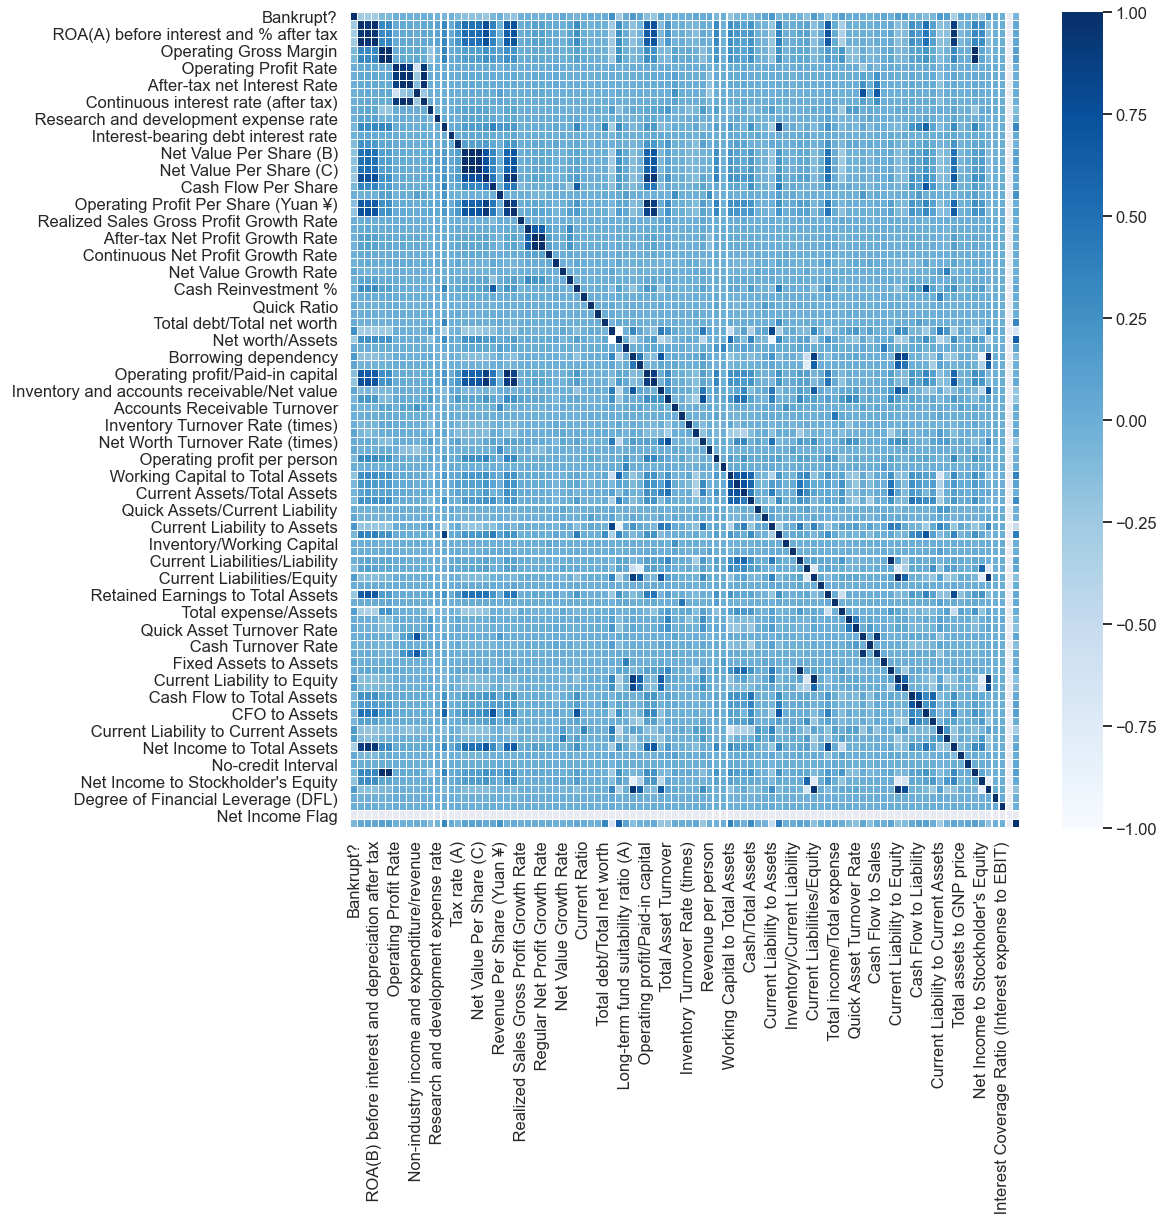

In [118]:
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),ax=ax,cmap='Blues',linewidth=0.1)

In [7]:
df = data.copy()

In [8]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

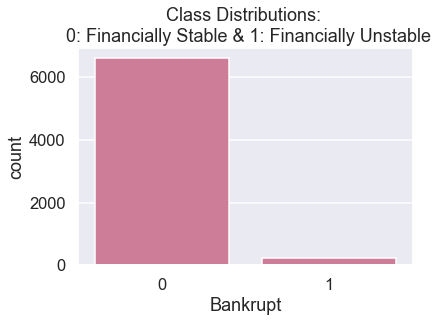

In [9]:
sns.countplot(data=data, x='Bankrupt?',color='palevioletred')
plt.xlabel('Bankrupt')
plt.title('Class Distributions: \n 0: Financially Stable & 1: Financially Unstable');

In [10]:
# Checking for Data imbalance
FS =  round(df['Bankrupt?'].value_counts()[0] / len(df) * 100,2)
FU = round(df['Bankrupt?'].value_counts()[1] / len(df) * 100, 2)

print('Financially stable:{}% of the dataset'.format(FS))
print('Financially unstable:{}% of the dataset'.format(FU))

Financially stable:96.77% of the dataset
Financially unstable:3.23% of the dataset


### Key Findings

- Data is highly skewed towards Financially stable. 
- If we train the model on this dataset, our prediction will be biased towards Financially stabled.
- Solution: Balance the dataset to train our model.


Splitting the Data before proceeding with the RandomUnderSampling 


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold,StratifiedKFold

In [12]:
X = df.drop('Bankrupt?', axis = 1)
y = df['Bankrupt?']

In [13]:
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X,y):
    print("\n Train", train_index, "Test", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


 Train [1104 1118 1132 ... 6816 6817 6818] Test [   0    1    2 ... 1383 1384 1385]

 Train [   0    1    2 ... 6816 6817 6818] Test [1104 1118 1132 ... 2796 2797 2798]

 Train [   0    1    2 ... 6816 6817 6818] Test [1860 1861 1862 ... 4136 4137 4138]

 Train [   0    1    2 ... 6816 6817 6818] Test [2100 2147 2148 ... 5475 5476 5477]

 Train [   0    1    2 ... 5475 5476 5477] Test [3749 3908 4071 ... 6816 6817 6818]


In [14]:
## turning into an array

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values



In [15]:
## See if both the train and test label distribution are similarly distributed 

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts = True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts = True)

print('Label Distirubtions: \n')
print(train_counts_label / len(original_ytrain))
print(test_counts_label / len(original_ytest))

Label Distirubtions: 

[0.96774194 0.03225806]
[0.96771827 0.03228173]


### Random Under-Sampling 
Implementing Random Under Sampling which basically consists of removing data in order to have a more balanced dataset to avoid overfitting

In [16]:
# shuffle the data before creating the subsamples
df = df.sample(frac = 1)

## amount of Financially unstable data is 220

fs = df.loc[df['Bankrupt?'] == 0][:220] # Financially stable
fu = df.loc[df['Bankrupt?']==1] # Financially unstable

normal_distributed_df = pd.concat([fs, fu])

# Shuffle dataframe rows
normal_df = normal_distributed_df.sample(frac = 1, random_state = 42)

In [17]:
normal_df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
1953,1,0.448204,0.508395,0.494245,0.599367,0.599367,0.998965,0.797325,0.809244,0.303420,0.781492,9.640000e+09,5.500000e+09,0.472204,0.000419,0.000000,0.169820,0.169820,0.169820,0.200813,0.335892,0.042198,0.096083,0.161558,0.022031,0.847928,0.688880,0.688880,0.161651,3.140000e+09,0.000417,0.263726,0.418800,0.008713,0.005527,0.629231,0.006900,0.127249,0.872751,0.007360,0.376734,0.005366,0.096056,0.160561,0.404239,0.166417,0.000578,0.010924,1.689086e-04,1.554603e-03,0.048871,0.083989,0.393184,0.005753,0.803201,0.462982,0.618333,0.022183,0.006331,0.000888,0.132416,0.372701,0.277430,0.006503,0.986470,0.735734,0.332309,0.000159,0.925335,0.002146,0.046225,0.000102,7.840000e+09,0.593939,1.080000e+09,0.671570,0.061654,0.986470,0.332309,0.111096,0.637456,0.458184,0.697231,0.313671,0.033396,0,0.773099,0.004535,0.623763,0.599369,0.838183,0.279784,0.026398,0.562174,1,0.029203
4153,0,0.395652,0.463694,0.450988,0.594373,0.594373,0.998881,0.797073,0.809053,0.303156,0.781291,1.004881e-04,1.660000e+09,0.459062,0.000709,0.000000,0.166912,0.166912,0.166912,0.192304,0.314388,0.018165,0.088429,0.149883,0.022071,0.847975,0.688239,0.688239,0.217459,6.350000e+09,0.000400,0.263211,0.369519,0.005669,0.005472,0.630336,0.007290,0.131269,0.868731,0.005777,0.373197,0.006310,0.088435,0.148842,0.397511,0.100450,0.001035,0.006111,4.234178e-04,2.

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Bankrupt?, dtype: float64


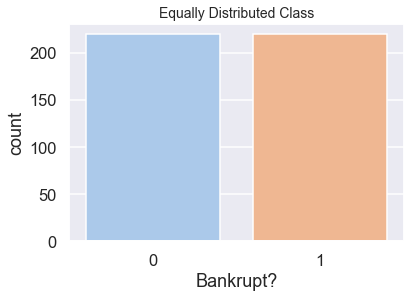

In [18]:

print("Distribution of the Classes in the subsample dataset")
print(normal_df['Bankrupt?'].value_counts() / len(normal_df))

sns.countplot('Bankrupt?', data = normal_df)
plt.title("Equally Distributed Class", fontsize = 14)
plt.show()

# Data Preprocessing

In [19]:
X = normal_df.drop(['Bankrupt?'],1)
y = normal_df['Bankrupt?']

rf_fs_Xtrain, rf_fs_Xtest, rf_fs_ytrain, rf_fs_ytest = train_test_split(X,y, test_size = 0.1, random_state = 1)

### Feature selection with RandomForest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [21]:
model = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
model.fit(rf_fs_Xtrain, rf_fs_ytrain)

sel = SelectFromModel(model)
sel.fit(rf_fs_Xtrain, rf_fs_ytrain)
selected_feat= rf_fs_Xtrain.columns[(sel.get_support())]

len(selected_feat)


27

In [22]:
selected_feat

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Pre-tax net Interest Rate', ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Net Value Growth Rate',
       ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
       ' Retained Earnings to Total Assets', ' Total income/Total expense',
       ' Net Income to Total Assets', ' Net Income to Stockholder's Equity',
       ' Liability to Equity', ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to

In [23]:
## Creating a dataframe for only selected values to train later

rf_fs = pd.DataFrame()

for column in selected_feat:
    if column in normal_df:
        rf_fs[column] = normal_df[column].values


In [24]:
rf_fs.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Net Value Growth Rate,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Borrowing dependency,Net profit before tax/Paid-in capital,Retained Earnings to Total Assets,Total income/Total expense,Net Income to Total Assets,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.448204,0.508395,0.494245,0.797325,0.809244,0.303420,0.781492,0.000000,0.169820,0.200813,0.161558,0.000417,0.005527,0.629231,0.006900,0.127249,0.872751,0.376734,0.160561,0.925335,0.002146,0.773099,0.838183,0.279784,0.026398,0.562174,0.029203
1,0.395652,0.463694,0.450988,0.797073,0.809053,0.303156,0.781291,0.000000,0.166912,0.192304,0.149883,0.000400,0.005472,0.630336,0.007290,0.131269,0.868731,0.373197,0.148842,0.915418,0.002010,0.754064,0.836553,0.280066,0.026720,0.564797,0.028209
2,0.504363,0.562255,0.555330,0.797438,0.809347,0.303419,0.781608,0.262274,0.184695,0.225111,0.181517,0.000474,0.003172,0.632880,0.016722,0.191765,0.808235,0.381969,0.180544,0.934495,0.002291,0.805041,0.841229,0.286906,0.027821,0.567646,0.018150
3,0.498708,0.539959,0.554526,0.797386,0.809313,0.303395,0.781606,0.000000,0.172180,0.220667,0.170822,0.000498,0.004268,0.634285,0.015320,0.185718,0.814282,0.381266,0.169716,0.931744,0.002236,0.797048,0.840177,0.285890,0.032588,0.569420,0.018868
4,0.395213,0.415013,0.427485,0.796672,0.808605,0.302797,0.780868,0.000000,0.166533,0.170748,0.133615,0.000366,0.003305,0.630453,0.011319,0.163890,0.836110,0.380815,0.133029,0.907363,0.001948,0.723121,0.832500,0.282987,0.026741,0.564908,0.021886


### PCA

In [25]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components = n_components)
pca.fit(normal_df)

X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(rf_fs_Xtrain.values)
x_pca = pca.transform(normal_df)
x_pca.shape

(440, 2)

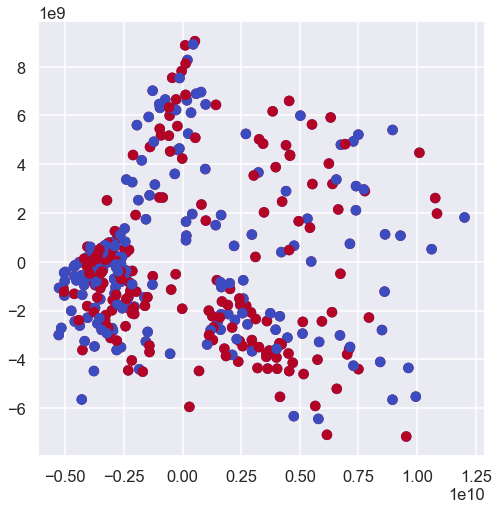

In [26]:
# PCA scatter plot
plt.figure(figsize = (8,8))
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(rf_fs_ytrain == 0), cmap='coolwarm', label= 'Stable_Company')#, linewidths=2)
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(rf_fs_ytrain == 1), cmap='coolwarm', label= 'Unstable_Company')#, linewidths=2)

plt.show()

### Testing our Models

- We will test our all the dataset i.e normal, random forest feature selection and PCA dataset with each model.

- For comparison we will make a new dataFrame and compare which method performed better.

- Also as it is classification problem, we will test it with following algorithms:

-- Logistic Regression

-- Naive Bayes

-- KNN

-- Decision Trees




- Preparing all the dataset for the models
- normal_df is the original dataset.
- rf_fs is the dataset with Feature Selection from Random Forest

In [28]:
## Splitting dataset for Normal data without feature selection

X_train, X_test, y_train, y_test = train_test_split(normal_df.drop('Bankrupt?', axis = 1), normal_df['Bankrupt?'],test_size = 0.1, random_state = 1)

In [29]:
normal_df.shape

(440, 96)

In [30]:
rf_fs.shape

(440, 27)

In [31]:
## Splitting RandomForest Feature Selection dataset

fs_Xtrain, fs_Xtest, fs_ytrain, fs_ytest = train_test_split(rf_fs, normal_df['Bankrupt?'], test_size = 0.1, random_state = 1)
model_score = pd.DataFrame(columns = ("Original_Dataset","Selected_Dataset"))


### 1)Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score,confusion_matrix


In [33]:
#original data set

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
score1 = lr.score(X_test, y_test)
lr_pred1 = lr.predict(X_test)

In [34]:

print("LR model Score:", score1)

LR model Score: 0.4772727272727273


In [35]:
lr_cm1 = confusion_matrix(y_test, lr_pred1, labels = (1,0))
lr_cm1

array([[ 7, 14],
       [ 9, 14]], dtype=int64)

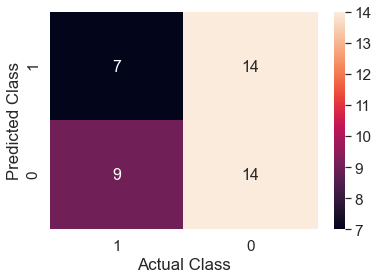

In [36]:
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(lr_cm1, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16})
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

In [37]:
y_test.value_counts()

0    23
1    21
Name: Bankrupt?, dtype: int64

In [38]:
#Feature Selection Dataset

lrmodel2 = LogisticRegression(max_iter=1000)
lrmodel2.fit(fs_Xtrain, fs_ytrain)
score2 = lrmodel2.score(fs_Xtest, fs_ytest)
lr_ypred2 = lrmodel2.predict(fs_Xtest)
print("Feature selection dataset's Score:", score2)

Feature selection dataset's Score: 0.4772727272727273


In [39]:
lr_cm2 = confusion_matrix(fs_ytest, lr_ypred2, labels = (1,0))
print("Confusion Matrix: \n", lr_cm2)

Confusion Matrix: 
 [[21  0]
 [23  0]]


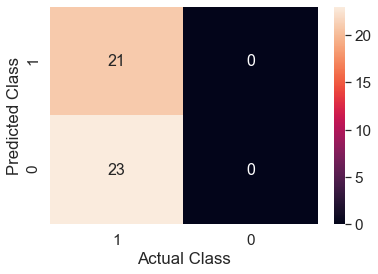

In [40]:
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(lr_cm2, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16})
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

In [41]:
model_score = model_score.append(pd.DataFrame({'Original_Dataset':[score1], 'Selected_Dataset': [score2]}, index = ['LogisticRegression']))

In [42]:
model_score

,Original_Dataset,Selected_Dataset
LogisticRegression,0.477273,0.477273


### 2) Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
#original dataset

naiveb1 = GaussianNB()
naiveb1.fit(X_train, y_train)
score1 = naiveb1.score(X_test, y_test)
nb_pred1 = naiveb1.predict(X_test)
print("Naive Bayes Score:", score1)

Naive Bayes Score: 0.5909090909090909


In [45]:
nb_cm1 = confusion_matrix(y_test, nb_pred1, labels = (1,0))

In [46]:
print("Confusion Matrix: \n", nb_cm1)

Confusion Matrix: 
 [[ 4 17]
 [ 1 22]]


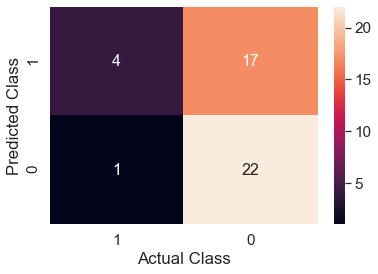

In [47]:
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(nb_cm1, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16})
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

In [48]:
#Feature Selection Dataset

In [49]:
naiveb2 = GaussianNB()
naiveb2.fit(fs_Xtrain, fs_ytrain)
score2 = naiveb2.score(fs_Xtest, fs_ytest)
nb_pred2 = naiveb2.predict(fs_Xtest)

In [50]:
print("Feature Selection Dataset's Score:", score2)

Feature Selection Dataset's Score: 0.5227272727272727


In [51]:
nb_cm2 = confusion_matrix(fs_ytest, nb_pred2, labels = [1,0])
print("Confusion Matrix: \n", nb_cm2)

Confusion Matrix: 
 [[ 0 21]
 [ 0 23]]


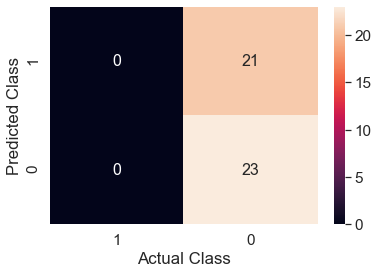

In [52]:
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(nb_cm2, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16})
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

In [53]:
model_score = model_score.append(pd.DataFrame({'Original_Dataset': [score1], 'Selected_Dataset': [score2]}, index = ['NaiveBayes']))

In [54]:
model_score

,Original_Dataset,Selected_Dataset
LogisticRegression,0.477273,0.477273
NaiveBayes,0.590909,0.522727


### 3)KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn1 = KNeighborsClassifier(n_neighbors = 7)
knn1.fit(X_train, y_train)
score1 = knn1.score(X_test, y_test)
print(score1)

0.6363636363636364


In [57]:
knn_pred1 = knn1.predict(X_test)
knn_cm1 = confusion_matrix(y_test, knn_pred1, labels = (1,0))
print("Confusion Matrix:\n", knn_cm1)

Confusion Matrix:
 [[13  8]
 [ 8 15]]


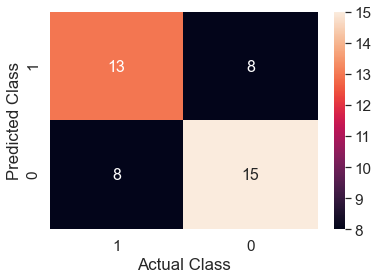

In [58]:
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(knn_cm1, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16})
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

In [59]:
### Hyperparameter tuning for KNN
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_knn = knn.predict(X_test)
    error_rate.append(np.mean(pred_knn != y_test))


Text(0, 0.5, 'Error Rate')

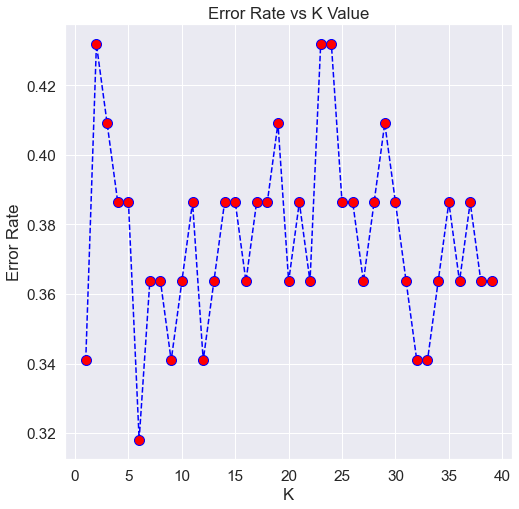

In [60]:
plt.figure(figsize = (8,8))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10);
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [61]:
## observe the difference 

tuned_knn1 = KNeighborsClassifier(n_neighbors = 16)
tuned_knn1.fit(X_train, y_train)
tuned_score1 = tuned_knn1.score(X_test, y_test)
print(tuned_score1)

0.6363636363636364


In [62]:
#not much difference in score

In [63]:
#Feature Selection Dataset
knn2 = KNeighborsClassifier(n_neighbors = 7)
knn2.fit(fs_Xtrain, fs_ytrain)
score2 = knn2.score(fs_Xtest, fs_ytest)
print("Feature Selection Dataset's Score:", score2)

Feature Selection Dataset's Score: 0.75


In [64]:
knn_pred2 = knn2.predict(fs_Xtest)
knn_cm2 = confusion_matrix(fs_ytest, knn_pred2, labels = (1,0))
print("Confusion Matrix: \n", knn_cm2)

Confusion Matrix: 
 [[16  5]
 [ 6 17]]


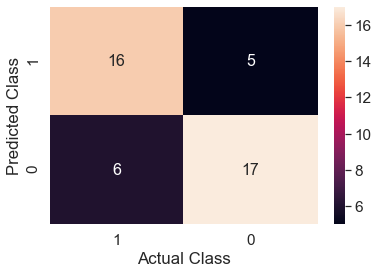

In [65]:
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(knn_cm2, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16})
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()


In [66]:
model_score = model_score.append(pd.DataFrame({'Original_Dataset': [tuned_score1], 'Selected_Dataset': [tuned_score1]}, index = ['KNN']))

### 4)Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dt1 = DecisionTreeClassifier()
dt1 = dt1.fit(X_train, y_train)
score1 = dt1.score(X_test, y_test)
print("Decision Tree Score:",score1)

Decision Tree Score: 0.8636363636363636


In [69]:
dt_pred1 = dt1.predict(X_test)
dt_cm1 = confusion_matrix(y_test, dt_pred1, labels = [1,0])
print("Confusion Matrix: \n", dt_cm1)

Confusion Matrix: 
 [[19  2]
 [ 4 19]]


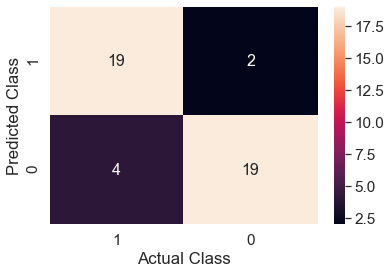

In [70]:
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(dt_cm1, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16})
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

In [71]:
#Feature Selection Data
dt2 = DecisionTreeClassifier()
dt2 = dt2.fit(fs_Xtrain, fs_ytrain)
score2 = dt2.score(fs_Xtest, fs_ytest)
print("Feature Selection Dataset's score:",score2)

Feature Selection Dataset's score: 0.7954545454545454


In [72]:
dt_pred2 = dt2.predict(fs_Xtest)
dt_cm2 = confusion_matrix(fs_ytest, dt_pred2, labels = [1,0])
print("Confusion Matrix: \n", dt_cm2)

Confusion Matrix: 
 [[17  4]
 [ 5 18]]


In [73]:
model_score = model_score.append(pd.DataFrame({'Original_Dataset': [score1], 'Selected_Dataset': [score2]}, index = ['DecisionTrees']))

# Conclusion

In [74]:
model_score

,Original_Dataset,Selected_Dataset
LogisticRegression,0.477273,0.477273
NaiveBayes,0.590909,0.522727
KNN,0.636364,0.636364
DecisionTrees,0.863636,0.795455
